# lire le fichier FINKE_PROJET4

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

C:\Users\FINKE epse TAKOU\.conda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Importation du fichier customers.csv
customers = pd.read_csv('FINKE_PROJET_4_1.csv', delimiter = ",")

In [3]:
customers

,Unnamed: 0,id_prod,date,session_id,client_id,price,categ,sex,birth,day,year,month,monthyear,age,tranche
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20,2022,5,2022-05,37,36-45
1,1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02,2022,2,2022-02,35,26-35
2,3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24,2021,6,2021-06,23,16-25
3,4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11,2023,1,2023-01,43,36-45
4,5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972,2022-10-20,2022,10,2022-10,51,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632684,679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01-15,2022,1,2022-01,72,66-75
632685,679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03-19,2022,3,2022-03,46,46-55
632686,679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12-20,2022,12,2022-12,35,26-35
632687,679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021-07-16,2021,7,2021-07,37,36-45


# Analyse du genre et de la catégorie

# calcul de la correlation pour voir s'il ya une relation entre la categorie de produit et le sex des clients

In [4]:
# construction des cartes thermiques sont un moyen facile de voir visuellement les tableaux de contingence.
X = "sex"
Y = "categ"

contingence =customers[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contingence

categ,0.0,1.0,2.0,Total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
Total,387493,212348,32848,632689


In [24]:
# Test d'indépendance du chi-deux. 
result_test = chi2_contingency(contingence)
print("statistique de test :",result_test[0])
print("p_value :",result_test[1])
print("degré de liberté :",result_test[2])

statistique de test : 20.200173796862927
p_value : 0.002551063708568263
degré de liberté : 6


In [6]:
chi2, pvalue, degrees, expected = chi2_contingency(contingence)
chi2, degrees, pvalue

(20.200173796862927, 6, 0.002551063708568263)

# Age des clients et montant total des achats

In [7]:
#création de la colonne de frequence d'achats
customers['freq'] =1
customers

,Unnamed: 0,id_prod,date,session_id,client_id,price,categ,sex,birth,day,year,month,monthyear,age,tranche,freq
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20,2022,5,2022-05,37,36-45,1
1,1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02,2022,2,2022-02,35,26-35,1
2,3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24,2021,6,2021-06,23,16-25,1
3,4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11,2023,1,2023-01,43,36-45,1
4,5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972,2022-10-20,2022,10,2022-10,51,46-55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632684,679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01-15,2022,1,2022-01,72,66-75,1
632685,679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03-19,2022,3,2022-03,46,46-55,1
632686,679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12-20,2022,12,2022-12,35,26-35,1
632687,679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021-07-16,2021,7,2021-07,37,36-45,1


In [46]:
bb=customers.loc[:,['age','price']]
bb

,age,price
0,37,4.18
1,35,15.99
2,23,69.99
3,43,4.99
4,51,8.57
...,...,...
632684,72,12.99
632685,46,10.99
632686,35,12.99
632687,37,4.98


In [8]:
#montant total des achats et âge des clients
AA=pd.DataFrame(customers.groupby(['age'])['price', 'freq'].aggregate('sum'))
AA

<ipython-input-8-4a0a88aa7022>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AA=pd.DataFrame(customers.groupby(['age'])['price', 'freq'].aggregate('sum'))


,price,freq
age,,
19,609013.690000,15149
20,178195.780000,4371
21,184229.714320,4587
22,178497.700000,4252
23,165042.889547,4415
...,...,...
90,5271.804773,327
91,5043.190000,311
92,2815.450000,170


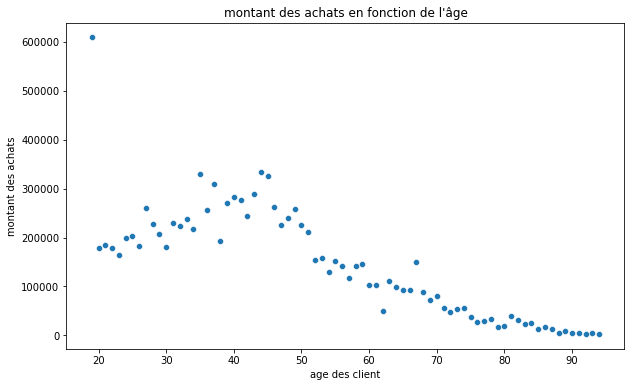

In [9]:
# montant des achats en fonction de l'âge
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
X = AA.index
Y = AA['price']
sns.scatterplot(data=AA, x="age", y="price")
plt.title("montant des achats en fonction de l'âge")
plt.xlabel("age des client")
plt.ylabel("montant des achats")
#ax.set_yscale('log')
plt.show()

# Test de normalité
Test de Shapiro-wilk

In [47]:
#tester l’hypothèse H0 contre l’hypothèse H1 : H0:la distribution n'est pas normale
#                                           H1:la distribution est  normale

from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(bb)

C:\Users\FINKE epse TAKOU\.conda\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9033613801002502, pvalue=0.0)

# Le test de pearsonr
Pour déterminer si deux variables continues sont indépendantes on fait le test de corrélation de Pearson. L’hypothèse nulle est
à tester et on montre que l'âge et le montant des achats sont indépendants.

Le coefficient de Pearson permet de mesurer le niveau de corrélation entre les deux variables. Il renvoie une valeur entre -1 
et 1. Si il est proche de 1 cela signifie que les variables sont corrélées, proche de 0 que les variables sont décorrélées et
proche de -1 qu’elles sont corrélées négativement.

In [10]:
#importons la librairie qui nous permet de faire le test de pearsonr
from scipy.stats import pearsonr


In [11]:
#calculons la correlation 
corr, _ = pearsonr(X, Y)
print('Pearsonr correlation: %.3f' % corr)

Pearsonr correlation: -0.831


In [12]:
pd.DataFrame(pearsonr(X,Y), index = ['pearson_coefficient', 'p-value'])

,0
pearson_coefficient,-8.305632e-01
p-value,1.709515e-20


# Lien entre l’âge des clients et la fréquence d’achat

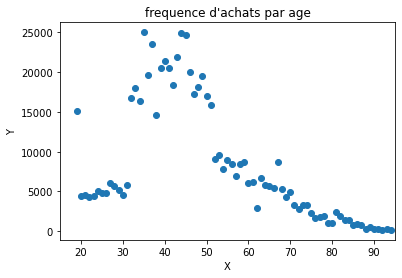

In [13]:
X = AA.index
Y = AA['freq']
plt.scatter(X,Y)
plt.xlim(15,95)
plt.title("frequence d'achats par age")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [43]:
cc=customers.loc[:,['age','freq']]
cc

,age,freq
0,37,1
1,35,1
2,23,1
3,43,1
4,51,1
...,...,...
632684,72,1
632685,46,1
632686,35,1
632687,37,1


In [48]:
#tester l’hypothèse H0 contre l’hypothèse H1 : H0:la distribution n'est pas normale
#                                           H1:la distribution est  normale


from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(cc)

ShapiroResult(statistic=0.8105865120887756, pvalue=0.0)

In [14]:
pd.DataFrame(pearsonr(X,Y), index = ['pearson_coefficient', 'p-value'])

,0
pearson_coefficient,-5.744026e-01
p-value,5.780324e-08


# Lien entre l’âge des clients et la taille du panier moyen
la taille du panier moyen est egal au total des ventes sur la frequence d'achat

In [15]:
# créons la colonne "panier moyen"
AA['paniermoy']= AA['price']/AA['freq']
AA

,price,freq,paniermoy
age,,,
19,609013.690000,15149,40.201577
20,178195.780000,4371,40.767737
21,184229.714320,4587,40.163443
22,178497.700000,4252,41.979704
23,165042.889547,4415,37.382308
...,...,...,...
90,5271.804773,327,16.121727
91,5043.190000,311,16.216045
92,2815.450000,170,16.561471


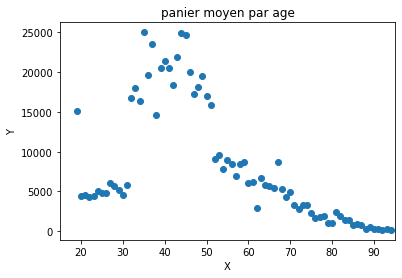

In [16]:
X1 = AA.index
Y1 =AA['paniermoy']
plt.scatter(X,Y)
plt.xlim(15,95)
plt.title("panier moyen par age")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [50]:
#tester l’hypothèse H0 contre l’hypothèse H1 : H0:la distribution n'est pas normale
#                                           H1:la distribution est  normale


from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(AA)

ShapiroResult(statistic=0.6122250556945801, pvalue=2.161747471666582e-22)

In [ ]:
Nous constatons que la statistique de test est de 0,6122 et la valeur p correspondante est de 2.16e-22

la valeur de p est inférieure à 05, nous rejetons l’hypothèse nulle. Nous pouvons dire
que les données de l’échantillon  proviennent d’une distribution normale.Alors nous pouvons faire le test de pearson

In [17]:
pd.DataFrame(pearsonr(X1,Y1), index = ['pearson_coefficient', 'p-value'])

,0
pearson_coefficient,-5.469614e-01
p-value,3.185191e-07


# Lien entre l’âge des clients et les catégories des livres achetés
Pour savoir si une variable catégorielle et une variable quantitative 
sont liées, on utilise l’ANOVA ou test d’analyse de la variance. On teste ici l’hypothèse nulle qui demontre si la catégorie
des livres achetés et l’âge sont indépendants

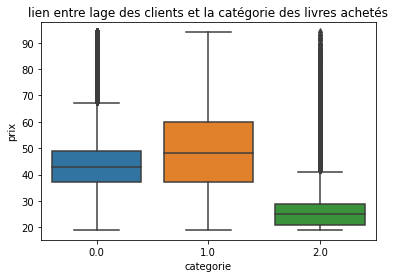

In [18]:
#visualisation du lien entre l'age des clients et la categorie des produits achetée
ax = sns.boxplot(x='categ', y='age', data=customers)
plt.xlabel('categorie')
plt.ylabel('prix')
plt.title('lien entre lage des clients et la catégorie des livres achetés')
plt.show()

In [52]:
# construction des cartes thermiques sont un moyen facile de voir visuellement les tableaux de contingence.
X = "age"
Y = "categ"

contingenc =customers[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contingenc

categ,0.0,1.0,2.0,Total
age,,,,
19,3418,5719,6012,15149
20,909,1678,1784,4371
21,1019,1723,1845,4587
22,974,1550,1728,4252
23,1116,1628,1671,4415
...,...,...,...,...
91,132,177,2,311
92,77,91,2,170
93,75,149,2,226


In [53]:
# Test d'indépendance du chi-deux. 
result_test = chi2_contingency(contingenc)
print("statistique de test :",result_test[0])
print("p_value :",result_test[1])
print("degré de liberté :",result_test[2])

statistique de test : 275513.28594457
p_value : 0.0
degré de liberté : 228


In [19]:
# get ANOVA table as R like output / obtenir le tableau ANOVA sous forme de sortie de type R
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model / Modèle des moindres carrés ordinaires (MCO)
model = ols('categ ~ C(age)', data=customers).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(age),58863.344838,75.0,3051.902723,0.0
Residual,162686.343752,632613.0,NaN,NaN


In [23]:
model =ols('categ ~ C(age)', data=customers).fit()
model.summary()
#le R carré a une valeur de 0,265 ce qui signifie que notre modèle explique 26,5 % de la variation de notre variable
#« categorie de livres» par l'âge La Prob (F-Statistic) est de 0.00 La statistique de Fisher (F-statistic) est <0,05 
#Il y a une différence significative de l'âge moyen des clients selon la catégorie de livres achetés; la catégorie de livres 
#achetés depend de l'âge des clients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  categ   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     3052.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:00:47   Log-Likelihood:            -4.6810e+05
No. Observations:              632689   AIC:                         9.364e+05
Df Residuals:                  632613   BIC:                         9.372e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1712      0.004    284.268      0.000       1.163       1.179
C(age)[T.20]     0.0290      0.009      3.325      0.001       0.012       0.046
C(age)[T.21]     0.0088      0.009      1.035      0.301      -0.008       0.026
C(age)[T.22]     0.0061      0.009      0.693      0.489      -0.011       0.023
C(age)[T.23]    -0.0455      0.009     -5.249      0.000      -0.063      -0.029
C(age)[T.24]    -0.0143      0.008     -1.732      0.083      -0.030       0.002
C(age)[T.25]     0.0432      0.008      5.163      0.000       0.027       0.060
C(age)[T.26]    -0.0693      0.008     -8.223      0.000      -0.086      -0.053
C(age)[T.27]     0.0668      0.008      8.653      0.000       0.052       0.082
C(age)[T.28]    -0.0114      0.008     -1.442      0.149      -0.027       0.004
C(age)[T.29]     0.0385      0.008      4.712      0.000       0.022       0.054
C(age)[T.30]    -0.0102      0.009     -1.195      0.232      -0.027       0.007
C(age)[T.31]     0.0184      0.008      2.350      0.019       0.003       0.034
C(age)[T.32]    -0.9340      0.006   -164.354      0.000      -0.945      -0.923
C(age)[T.33]    -0.9329      0.006   -166.745      0.000      -0.944      -0.922
C(age)[T.34]    -0.9328      0.006   -163.065      0.000      -0.944      -0.922
C(age)[T.35]    -0.9314      0.005   -178.390      0.000      -0.942      -0.921
C(age)[T.36]    -0.9348      0.005   -170.424      0.000      -0.946      -0.924
C(age)[T.37]    -0.9333      0.005   -176.592      0.000      -0.944      -0.923
C(age)[T.38]    -0.9173      0.006   -156.073      0.000      -0.929      -0.906
C(age)[T.39]    -0.9268      0.005   -170.505      0.000      -0.937      -0.916
C(age)[T.40]    -0.9281      0.005   -172.308      0.000      -0.939      -0.917
C(age)[T.41]    -0.9175      0.005   -168.986      0.000      -0.928      -0.907
C(age)[T.42]    -0.9240      0.006   -166.135      0.000      -0.935      -0.913
C(age)[T.43]    -0.9308      0.005   -173.726      0.000      -0.941      -0.920
C(age)[T.44]    -0.9206      0.005   -176.172      0.000      -0.931      -0.910
C(age)[T.45]    -0.9333      0.005   -178.311      0.000      -0.944      -0.923
C(age)[T.46]    -0.9302      0.005   -170.278      0.000      -0.941      -0.919
C(age)[T.47]    -0.9325      0.006   -165.202      0.000      -0.944      -0.921
C(age)[T.48]    -0.9193      0.006   -164.627      0.000      -0.930      -0.908
C(age)[T.49]    -0.9328      0.005   -169.759      0.000      -0.944      -0.922
C(age)[T.50]    -0.9239      0.006   -162.968      0.000      -0.935      -0.913
C(age)[T.51]    -0.9196      0.006   -159.492      0.000      -0.931      -0.908
C(age)[T.52]    -0.5967      0.007    -88.822      0.000      -0.610      -0.584
C(age)[T.53]    -0.5931      0.007    -89.618      0.000      -0.606      -0.580
C(age

In [ ]:
le R carré a une valeur de 0,266 ce qui signifie que notre modèle explique 26,6 % de la variation de notre variable 
« categorie de livres» par l'âge La Prob (F-Statistic) est de 0.00 La statistique de Fisher (F-statistic) est <0,05 
Il y a une différence significative de l'âge moyen des clientsselon la catégorie de livres achetés; la catégorie de livres
achetés depend de l'âge des clients